# Chicago Crime Data: Part 1

# Load Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load
df = pd.read_csv('Data/Crimes_-_2001_to_Present.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369706 entries, 0 to 369705
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    369706 non-null  int64  
 1   Case Number           369706 non-null  object 
 2   Date                  369706 non-null  object 
 3   Block                 369706 non-null  object 
 4   IUCR                  369706 non-null  object 
 5   Primary Type          369706 non-null  object 
 6   Description           369706 non-null  object 
 7   Location Description  367003 non-null  object 
 8   Arrest                369706 non-null  bool   
 9   Domestic              369706 non-null  bool   
 10  Beat                  369706 non-null  int64  
 11  District              369705 non-null  float64
 12  Ward                  369497 non-null  float64
 13  Community Area        369497 non-null  float64
 14  FBI Code              369706 non-null  object 
 15  

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


# Prepare Date Time Index

In [3]:
# Change 'Date' object to datetime
df['Date'] = pd.to_datetime(df['Date']) 

In [4]:
# Set index
df = df.set_index('Date')
df.index

DatetimeIndex(['2015-03-18 12:00:00', '2018-12-20 15:00:00',
               '2016-05-01 00:25:00', '2018-12-20 16:00:00',
               '2014-06-01 00:01:00', '2018-09-01 00:01:00',
               '2018-01-01 08:00:00', '2018-04-01 00:01:00',
               '2015-02-02 10:00:00', '2012-05-05 12:25:00',
               ...
               '2021-03-26 10:10:00', '2020-12-04 23:30:00',
               '2021-05-09 09:00:00', '2020-11-18 16:00:00',
               '2021-04-11 23:05:00', '2021-03-13 02:00:00',
               '2021-05-13 19:00:00', '2021-05-31 08:12:00',
               '2020-12-27 09:00:00', '2021-05-01 16:55:00'],
              dtype='datetime64[ns]', name='Date', length=369706, freq=None)

# Stakeholder Questions

## 1. Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [5]:
# Slice out only data from 2022
year_2022 = df.loc['2022',['District']]
year_2022

,District
Date,
2022-01-11 15:00:00,4.0
2022-01-14 15:55:00,7.0
2022-08-05 21:00:00,3.0
2022-08-14 14:00:00,16.0
2022-11-10 03:47:00,7.0
...,...
2022-12-01 00:00:00,11.0
2022-08-19 09:00:00,11.0
2022-08-22 00:00:00,15.0


In [6]:
# Value counts
year_2022_crime_counts = year_2022['District'].value_counts().sort_values()
year_2022_crime_counts

31.0      1
15.0     67
20.0     72
17.0     94
10.0     94
22.0    109
24.0    109
14.0    115
5.0     129
3.0     131
7.0     132
4.0     142
9.0     144
6.0     159
2.0     168
11.0    178
25.0    183
18.0    193
16.0    211
1.0     218
12.0    225
19.0    233
8.0     281
Name: District, dtype: int64

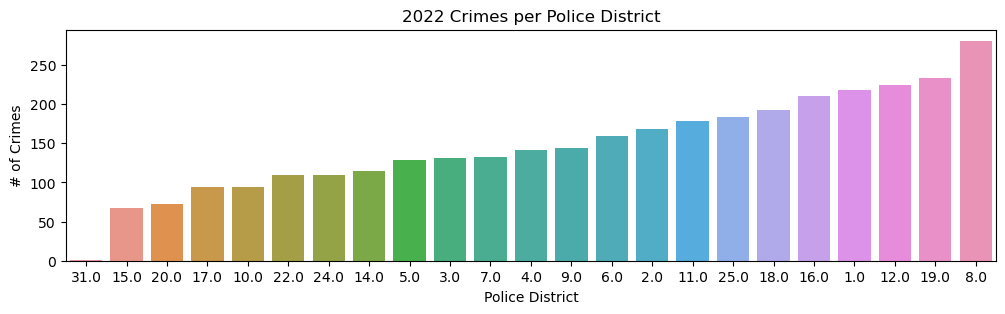

In [7]:
# Visualize
fig, ax = plt.subplots(figsize = (12,3))
ax = sns.countplot(data = year_2022, x = 'District', order = year_2022_crime_counts.index)
ax.set(title = '2022 Crimes per Police District', ylabel = '# of Crimes', xlabel = 'Police District');

- Based on the graph:
 - Which district had the most crimes in 2022?
   - District 8
 - Which had the least
   - District 31?

## 2. Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)

In [8]:
# Create year column
df['Year'] = df.index.year
df['Year']

Date
2015-03-18 12:00:00    2015
2018-12-20 15:00:00    2018
2016-05-01 00:25:00    2016
2018-12-20 16:00:00    2018
2014-06-01 00:01:00    2014
                       ... 
2021-03-13 02:00:00    2021
2021-05-13 19:00:00    2021
2021-05-31 08:12:00    2021
2020-12-27 09:00:00    2020
2021-05-01 16:55:00    2021
Name: Year, Length: 369706, dtype: int64

In [9]:
# Check crime count per year
crime_count = df['Year'].value_counts().sort_index()
crime_count

2001      175
2002      234
2003      174
2004      563
2005    90146
2006     5000
2007       80
2008      366
2009      360
2010      119
2011      131
2012      141
2013      195
2014      301
2015      390
2016      446
2017      569
2018     1336
2019     1790
2020    58591
2021    74893
2022     3388
2023    88069
2024    42249
Name: Year, dtype: int64

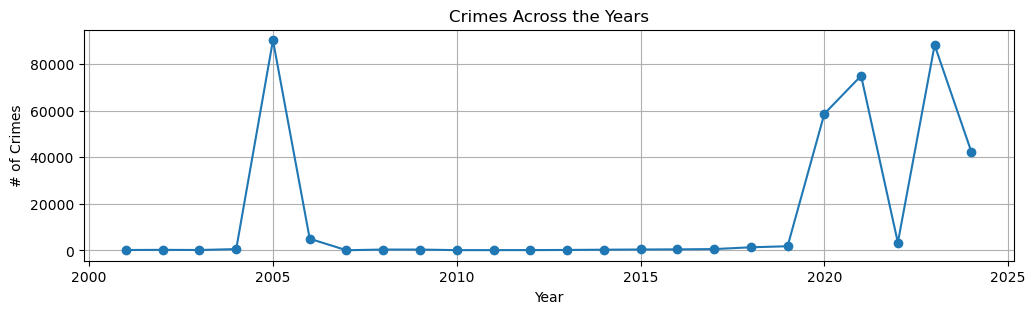

In [10]:
# 1. Visualization 
crime_count.plot(style = 'o-', grid = True, figsize = (12,3))
plt.title('Crimes Across the Years')
plt.xlabel('Year')
plt.ylabel('# of Crimes');

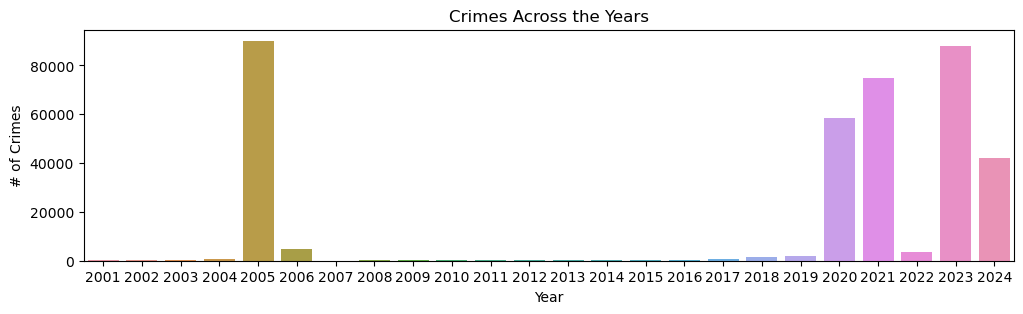

In [11]:
# 2. Visualization
fig, ax = plt.subplots(figsize = (12,3))
ax = sns.countplot(data = df, x = 'Year')
ax.set(title = 'Crimes Across the Years', ylabel = '# of Crimes');

- Crimes across the years have fluctuated throughout the periods of 2000 to 2024.
- It may be difficult to conclude if crimes are increasing or decreasing wihtout identiying any existing pattern in the timeframe of years

In [12]:
# Check types of crimes 
df['Primary Type'].value_counts().index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'NARCOTICS', 'ROBBERY',
       'BURGLARY', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'CRIM SEXUAL ASSAULT', 'LIQUOR LAW VIOLATION', 'GAMBLING',
       'INTIMIDATION', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'OBSCENITY', 'PUBLIC INDECENCY', 'HUMAN TRAFFICKING',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'RITUALISM'],
      dtype='object')

In [13]:
# Top 5 crime counts
df['Primary Type'].value_counts().index[:5]

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE'], dtype='object')

In [14]:
# One-hot-encode 'Primary Type' column to count specific crime per year
ohe = pd.get_dummies(df['Primary Type'])
ohe.head(3)

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-12-20 15:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 00:25:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Create a sliced df of top five crimes
crime_df = ohe[['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE']]

In [16]:
# Resample data to years
crime_df_Y = crime_df.resample('Y').sum()

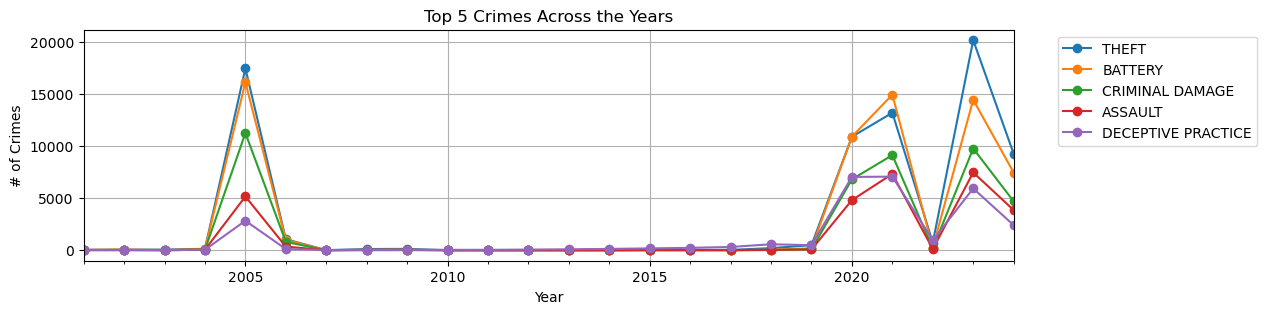

In [17]:
# Visualization
fig, ax = plt.subplots()
crime_df_Y.plot(figsize = (12,3), grid = True, style = 'o-', ax = ax)
ax.set(title = 'Top 5 Crimes Across the Years', ylabel = '# of Crimes', xlabel = 'Year')
ax.legend(loc='best', bbox_to_anchor=(1.04, 1));

- Are there any individual crimes increasing or decreasing across the years?
  - Based on the top 5 crime categories, it seems that these crimes increase or decrease simultaneously. 

## 3. Comparing AM vs. PM Rush Hour:
- Are Crimes more common during AM rush hour or PM rush hour?
  - You can consider any crime that occured between 7 AM - 10 AM as AM rush hour
  - You can consider any crime that occured between 7 AM - 10 AM as PM rush hour 

Anwer the following questions:
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most commmon crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour? 

In [18]:
# Create hour column
df['Hour'] = df.index.hour
df['Hour']

Date
2015-03-18 12:00:00    12
2018-12-20 15:00:00    15
2016-05-01 00:25:00     0
2018-12-20 16:00:00    16
2014-06-01 00:01:00     0
                       ..
2021-03-13 02:00:00     2
2021-05-13 19:00:00    19
2021-05-31 08:12:00     8
2020-12-27 09:00:00     9
2021-05-01 16:55:00    16
Name: Hour, Length: 369706, dtype: int64

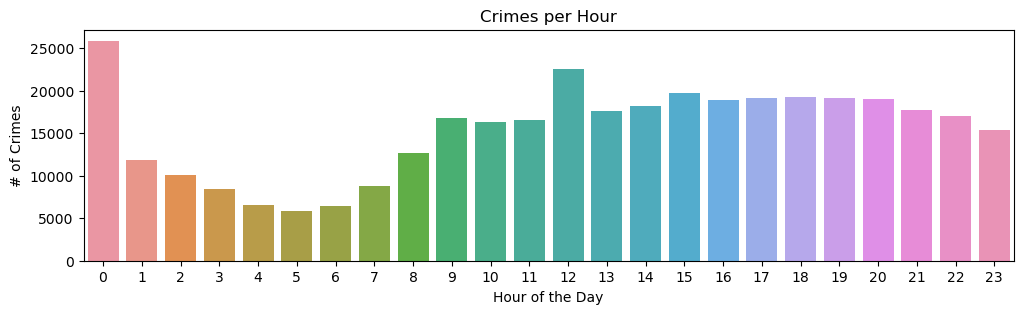

In [19]:
# Visualize crime per hour
fig, ax = plt.subplots(figsize = (12,3))
ax = sns.countplot(data = df, x = 'Hour')
ax.set(title = 'Crimes per Hour', xlabel = 'Hour of the Day', ylabel = '# of Crimes');

In [20]:
df2 = pd.concat([df, ohe], axis = 1)
df2

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,0,0,0,0,0,0,0,0,0,0
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,0,0,0,0,0,0,0,0,0,0
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,1,0,0,0,0,0,0,0,0,0
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13 02:00:00,12316661,JE170767,060XX S MAY ST,0810,THEFT,OVER $500,RESIDENCE,False,False,712,...,0,0,0,0,0,0,0,0,1,0
2021-05-13 19:00:00,12364752,JE229177,065XX S CHAMPLAIN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,321,...,0,0,0,0,0,0,0,0,0,0
2021-05-31 08:12:00,12380554,JE248618,066XX S HARTWELL AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,322,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Resample data to hours
crime_df_H = df2.resample('H').sum()
crime_df_H

C:\Users\JOSH\AppData\Local\Temp\ipykernel_6568\1506049624.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_df_H = df2.resample('H').sum()


,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,73109287,0,3,9567,94.0,174.0,353.0,5863060.0,9281290.0,18009,...,0,0,0,0,0,0,0,0,4,0
2001-01-01 01:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 02:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 03:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 04:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-06 20:00:00,508866954,8,8,43641,428.0,856.0,1445.0,41784869.0,67945926.0,76912,...,3,3,0,0,0,4,0,0,3,2
2024-03-06 21:00:00,334778611,6,5,24735,242.0,457.0,990.0,29028089.0,47142827.0,50600,...,1,0,0,0,0,1,0,0,5,1
2024-03-06 22:00:00,200870270,4,2,18759,184.0,356.0,526.0,17421013.0,28387328.0,30360,...,1,0,0,0,0,1,0,0,5,1


In [22]:
# AM Rush hour
seven_AM = df2.loc[df['Hour'] == 7]
eight_AM = df2.loc[df['Hour'] == 8]
nine_AM = df2.loc[df['Hour'] == 9]
ten_AM = df2.loc[df['Hour'] == 10]

In [23]:
# PM Rush Hour
sixteen_PM = df2.loc[df['Hour'] == 16]
seventeen_PM = df2.loc[df['Hour'] == 17]
eighteen_PM = df2.loc[df['Hour'] == 18]
nineteen_PM = df2.loc[df['Hour'] == 19]

In [24]:
# AM and PM Dataframe
AM_Frames = [seven_AM, eight_AM, nine_AM, ten_AM]
PM_Frames = [sixteen_PM, seventeen_PM, eighteen_PM, nineteen_PM]

In [25]:
# AM Rush Hour dataframe
am_df = pd.concat(AM_Frames)
am_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-06 07:45:00,12072697,JD257284,065XX S UNIVERSITY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER (SPECIFY),False,False,321,...,1,0,0,0,0,0,0,0,0,0
2018-03-09 07:00:00,11649676,JC217968,050XX S DR MARTIN LUTHER KING JR DR,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,223,...,0,0,0,0,0,0,0,0,0,0
2019-04-05 07:10:00,11645224,JC212415,001XX W IDA B WELLS DR,0810,THEFT,OVER $500,CTA TRAIN,False,False,121,...,0,0,0,0,0,0,0,0,1,0
2020-06-18 07:00:00,12081552,JD268138,096XX S VANDERPOEL AVE,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,2213,...,0,0,0,0,0,0,0,0,1,0
2020-07-27 07:00:00,12119968,JD313759,035XX N LEAVITT ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE - GARAGE,False,False,1921,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# PM Rush Hour dataframe
pm_df = pd.concat(PM_Frames)
pm_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,1,0,0,0,0,0,0,0,0,0
2020-04-07 16:50:00,12028031,JD204153,064XX S DR MARTIN LUTHER KING JR DR,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,312,...,0,0,0,0,0,0,0,0,0,0
2018-06-07 16:50:00,11649947,JC217353,047XX S INGLESIDE AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,False,222,...,0,0,0,0,0,0,0,0,0,0
2006-02-26 16:00:00,4607506,HM202388,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,DRUG STORE,False,False,2332,...,0,0,0,0,0,0,0,0,1,0
2018-10-05 16:15:00,11651475,JC219287,102XX W ZEMKE RD,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",OTHER,False,False,1654,...,0,0,0,0,0,0,0,0,0,0


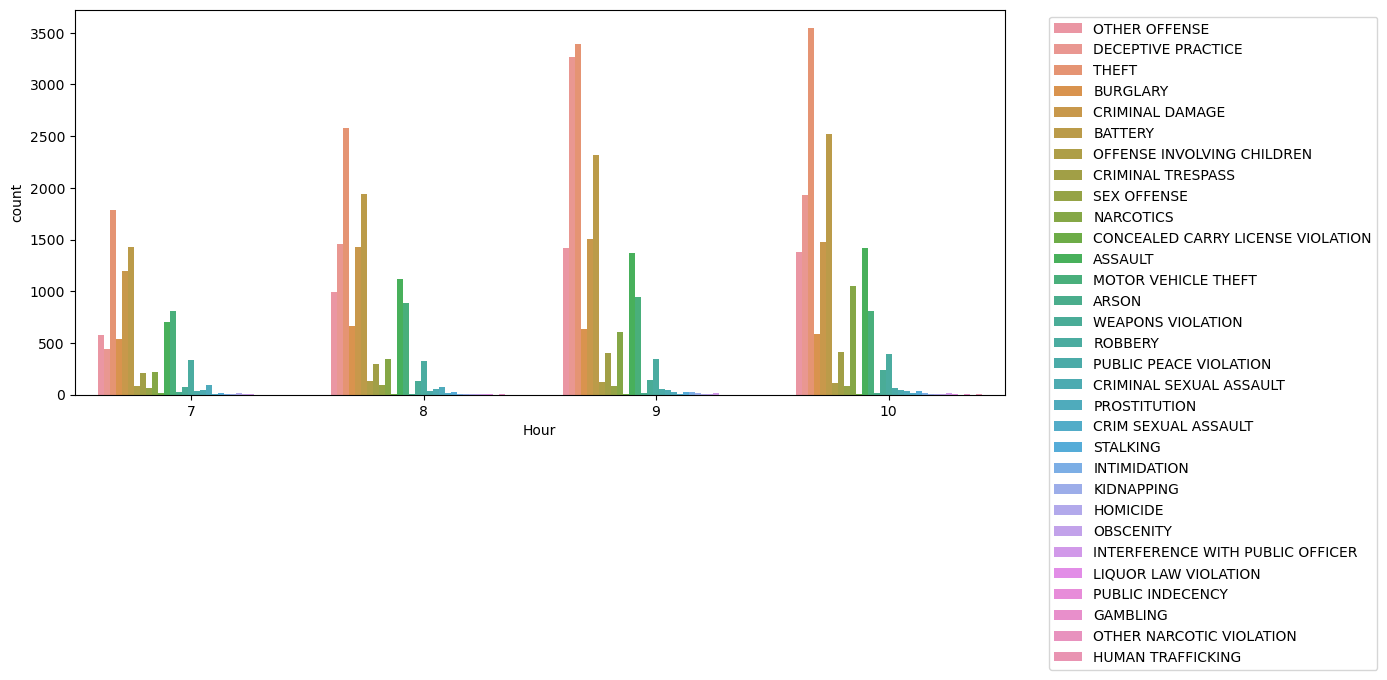

In [27]:
# Visualize AM Rush hour
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(data = am_df, x = 'Hour', hue= 'Primary Type')
ax.legend(loc='best', bbox_to_anchor=(1.04, 1));

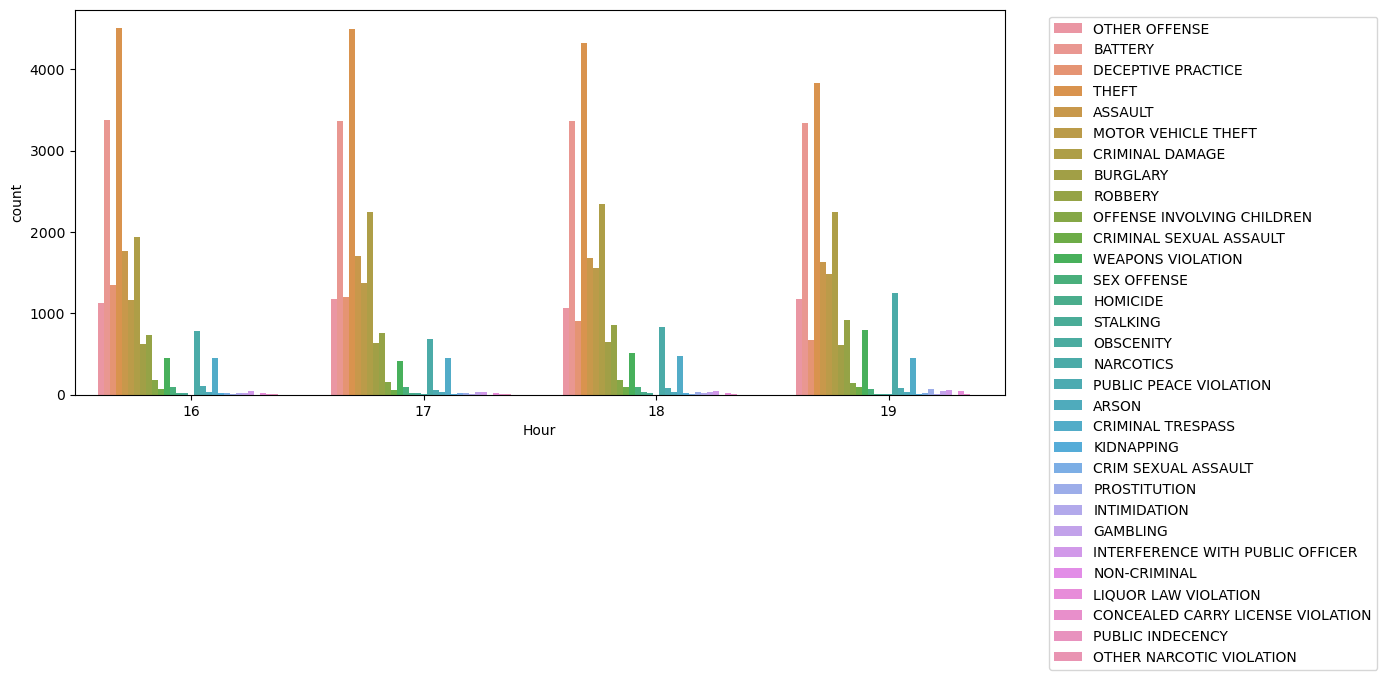

In [28]:
# Visualize PM Rush hour
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(data = pm_df, x = 'Hour', hue= 'Primary Type')
ax.legend(loc='best', bbox_to_anchor=(1.04, 1));

- What are the top 5 most common crimes during AM rush hour?
  - Other offense
  - Deceptive practice
  - Theft
  - Burglary
  - Criminal Damage

- What are the top 5 most common crimes during PM rush hour?
  - Other offense
  - Battery
  - Deceptive practice
  - Theft
  - Assault 

- Are Motor Vehicle Thefts more common during AM rush hour or PM rush hour?
  - PM

---

# Chicago Crime Data: Part 2

In [29]:
# Imports
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split
import pmdarima as pm
plt.rcParams['figure.figsize']=(12,3)

In [30]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [31]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

In [32]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [34]:
# Copy dataframe
ts_1 = df.copy()
ts_1

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN,12
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,15
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,0
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,16
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13 02:00:00,12316661,JE170767,060XX S MAY ST,0810,THEFT,OVER $500,RESIDENCE,False,False,712,...,68.0,06,1169685.0,1864754.0,2021,03/20/2021 03:39:56 PM,41.784386,-87.653410,"(41.784385856, -87.653409624)",2
2021-05-13 19:00:00,12364752,JE229177,065XX S CHAMPLAIN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,321,...,42.0,14,1181693.0,1861728.0,2021,05/20/2021 03:40:43 PM,41.775813,-87.609477,"(41.775813224, -87.609477267)",19
2021-05-31 08:12:00,12380554,JE248618,066XX S HARTWELL AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,322,...,69.0,15,1178418.0,1860850.0,2021,06/07/2021 03:40:29 PM,41.773479,-87.621510,"(41.773478919, -87.621509655)",8


In [35]:
# crime_per_month 
crimes_per_month = ts_1.groupby('Primary Type').resample('M').size()
crimes_per_month

Primary Type       Date      
ARSON              2001-01-31      1
                   2001-02-28      0
                   2001-03-31      0
                   2001-04-30      0
                   2001-05-31      0
                                ... 
WEAPONS VIOLATION  2023-11-30    654
                   2023-12-31    552
                   2024-01-31    611
                   2024-02-29    638
                   2024-03-31    141
Length: 7793, dtype: int64

In [36]:
# Check nulls
crimes_per_month.isna().sum()

0

<Axes: xlabel='Primary Type,Date'>

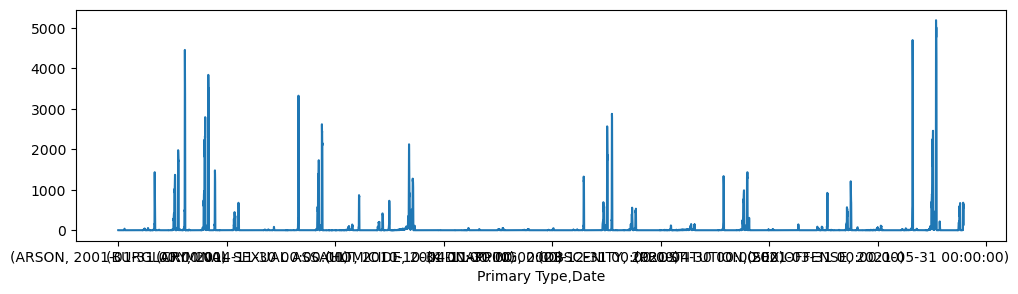

In [37]:
# Visualize
crimes_per_month.plot()

In [38]:
crimes_per_month.index.get_level_values(0)

Index(['ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON',
       'ARSON', 'ARSON',
       ...
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type', length=7793)

In [39]:
crimes_per_month.index.get_level_values(1)

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31'],
              dtype='datetime64[ns]', name='Date', length=7793, freq=None)

In [40]:
# Unstack
unstacked = crimes_per_month.unstack(level = 0)
unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN
2001-02-28,0.0,1.0,2.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN
2001-03-31,0.0,1.0,2.0,1.0,NaN,NaN,2.0,1.0,0.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN
2001-04-30,0.0,4.0,5.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN
2001-05-31,0.0,3.0,2.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,38.0,1794.0,3477.0,678.0,17.0,NaN,2421.0,140.0,416.0,1210.0,...,1315.0,11.0,1.0,60.0,NaN,1016.0,97.0,40.0,4769.0,654.0
2023-12-31,47.0,1782.0,3516.0,616.0,19.0,NaN,2443.0,99.0,381.0,1228.0,...,1279.0,4.0,2.0,60.0,NaN,996.0,106.0,35.0,5015.0,552.0
2024-01-31,44.0,1713.0,3271.0,544.0,15.0,NaN,2095.0,112.0,378.0,1177.0,...,1434.0,8.0,0.0,43.0,NaN,733.0,80.0,33.0,4315.0,611.0


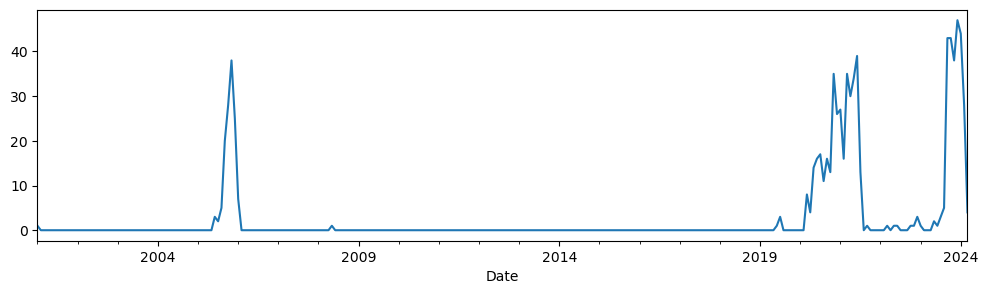

In [41]:
# Sample crime
unstacked['ARSON'].plot();

For this phase of the project, you will be helping Chicago law enforcement allocate resources for the next 6 months. 

You will compare the crime count forecast for 2 of the options below:
- Theft
- Battery
- Narcotics
- Assault
- Totla Crime (sum of all crime types) types).

## Time Series: Battery

In [42]:
# Select crime for time series modeling
ts_battery = unstacked['BATTERY']
ts_battery

Date
2001-01-31       NaN
2001-02-28       2.0
2001-03-31       2.0
2001-04-30       5.0
2001-05-31       2.0
               ...  
2023-11-30    3477.0
2023-12-31    3516.0
2024-01-31    3271.0
2024-02-29    3449.0
2024-03-31     739.0
Name: BATTERY, Length: 279, dtype: float64

In [43]:
# Check nulls
ts_battery.isna().sum()

1

In [44]:
# Fill null
ts_battery = ts_battery.fillna(method = 'bfill')
ts_battery

Date
2001-01-31       2.0
2001-02-28       2.0
2001-03-31       2.0
2001-04-30       5.0
2001-05-31       2.0
               ...  
2023-11-30    3477.0
2023-12-31    3516.0
2024-01-31    3271.0
2024-02-29    3449.0
2024-03-31     739.0
Name: BATTERY, Length: 279, dtype: float64

In [45]:
# Check nulls
ts_battery.isna().sum()

0

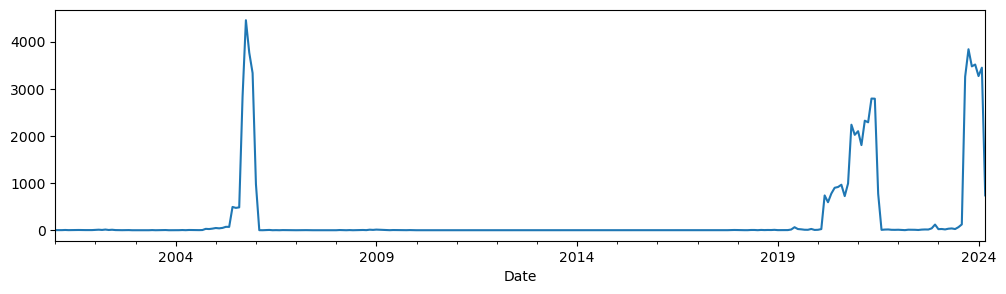

In [46]:
# Visualize
ts_battery.plot();

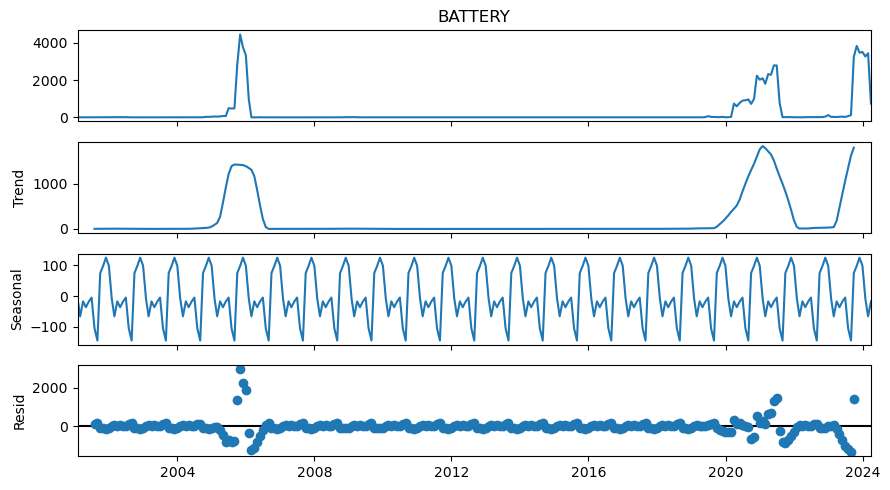

In [47]:
## Use Seasonal Decompose to check for seasonality
decomp = tsa.seasonal_decompose(ts_battery)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [48]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts_battery.max()-ts_battery.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 270.26119894598156 which is ~6.07% of the variation in time series.


In [50]:
# Check for stationarity
get_adfuller_results(ts_battery)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-4.130256,6,272,0.000863,0.05,True


In [51]:
# Determine differencing
d = ndiffs(ts_battery)
print(f'd is {d}')

d is 1


,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-8.06805,7,270,0.0,0.05,True


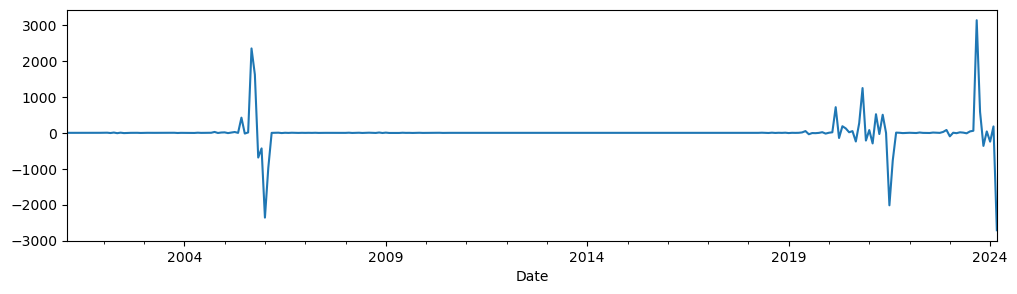

In [66]:
# Differencing the data once
ts_diff = ts_battery.diff().dropna()
ts_diff.plot()
# Checking for stationarity
get_adfuller_results(ts_diff)

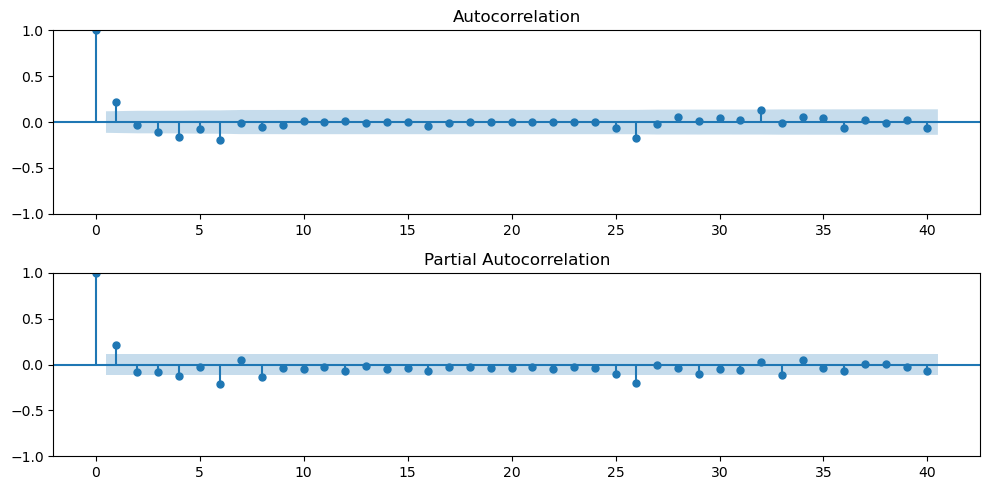

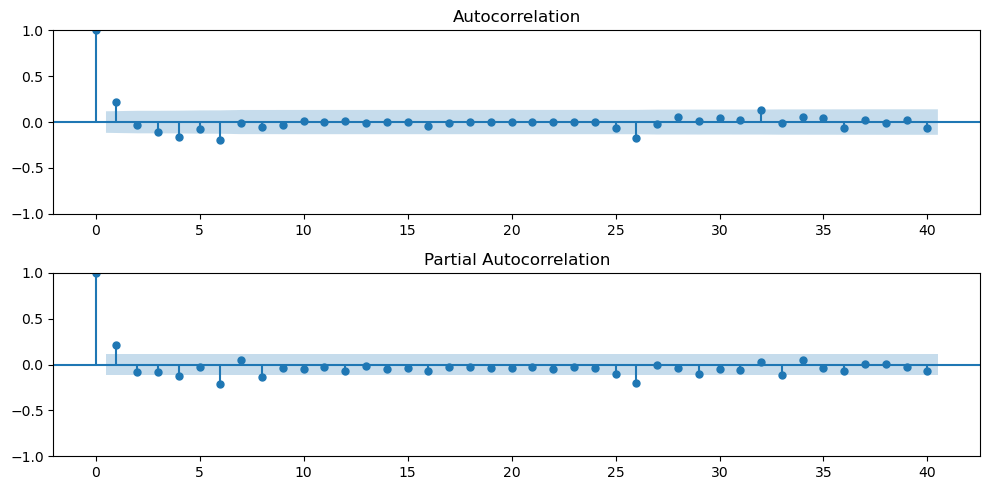

In [99]:
# Plot ACF and PACF
plot_acf_pacf(ts_diff)

### Train Test Split

In [68]:
# # Train test split
train, test = train_test_split(ts_battery, test_size = 6)

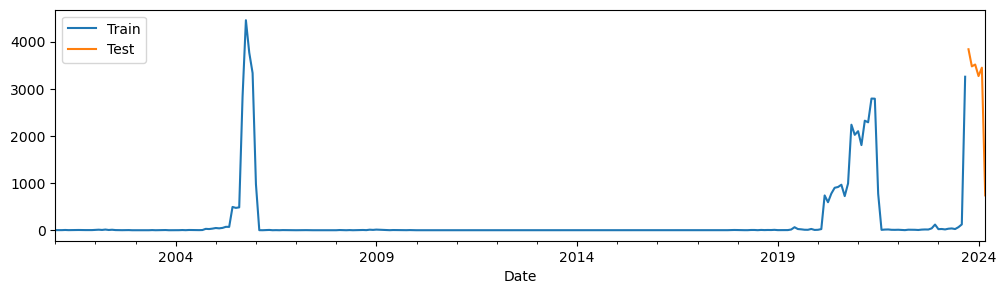

In [69]:
# # Visualize train-test-split
ax = train.plot(label = 'Train')
test.plot(ax = ax, label = 'Test')
ax.legend();

### Model and Evaluation

In [73]:
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0 # nonseasonal MA

# Define and fit the model
arima_model = tsa.ARIMA(train, order=(p,d,q)).fit()

C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 631.000
- MSE = 1,138,792.333
- RMSE = 1,067.142
- R^2 = -0.040
- MAPE = 62.60%


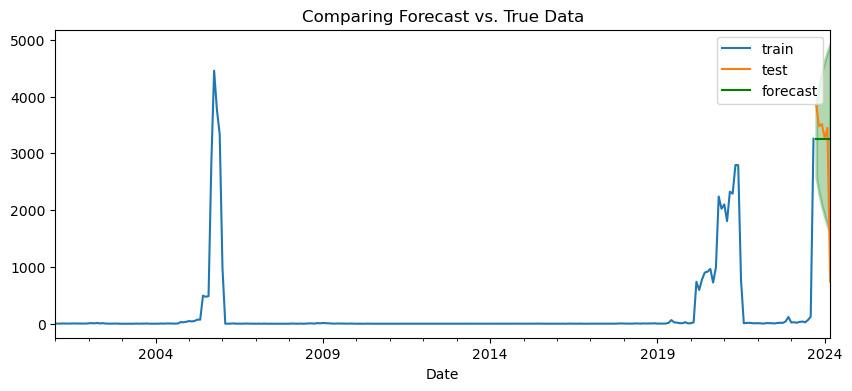

In [74]:
# Obtain summary of forecast as dataframe
forecast_df = arima_model.get_forecast(len(test)).summary_frame()

# Plot the forecast with true values
plot_forecast(train, test, forecast_df)

# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

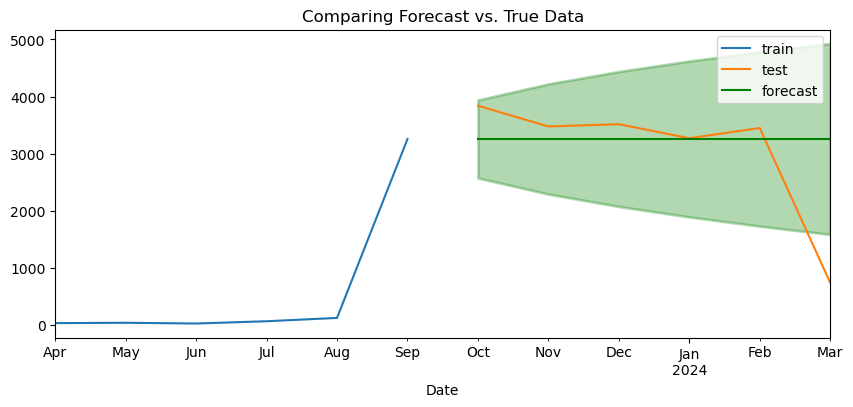

In [92]:
# Zoom in
plot_forecast(train, test, forecast_df, n_train_lags = 6);

In [82]:
# Obtain summary of model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                BATTERY   No. Observations:                  273
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1977.746
Date:                Mon, 25 Mar 2024   AIC                           3957.492
Time:                        16:42:48   BIC                           3961.097
Sample:                    01-31-2001   HQIC                          3958.939
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.214e+05   2184.759     55.545      0.000    1.17e+05    1.26e+05
===================================================================================
Ljung-Box (L1) (Q):                  15.15   Jarque-Bera (JB):             21534.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             2.30
Prob(H) (two-sided):                  0.58   Kurtosis:                        46.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
import itertools

# Define the value or range of values for p, d, q
p_values = range(0, 4)  
d_values = [1]          
q_values = range(0, 4)  

# Create combinations of pdq to test
pdq_to_try = list(itertools.product(p_values, d_values, q_values))
                                            
pdq_to_try

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [101]:
# define starting aic as infinity
best_aic = float("inf")  

# define baseline for pdq
best_pdq = (0,0,0)

# Loop through each combination
for pdq in pdq_to_try:
    
    model = tsa.ARIMA(train, order=pdq)
                              
    result = model.fit()
    
    print(pdq, result.aic)      
    
    # If lower, replace best AIC with new value
    if result.aic < best_aic:
        
        best_aic = result.aic
        best_pdq = pdq

# Print the best orders and AIC score
print("Best AIC:", best_aic)
print("Best pdq:", best_pdq)

C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

(0, 1, 0) 3957.4916293735123
(0, 1, 1) 3933.267572788128
(0, 1, 2) 3935.150790119016
(0, 1, 3) 3937.1187987830517
(1, 1, 0) 3937.4151411427697
(1, 1, 1) 3935.113050156615


C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

(1, 1, 2) 3921.102273116852


C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 3) 3922.2876383328044
(2, 1, 0) 3934.2061559843514
(2, 1, 1) 3918.811248519097


C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

(2, 1, 2) 3920.5446333276664


C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 3) 3922.489744278421
(3, 1, 0) 3933.7471005540656


C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

(3, 1, 1) 3920.552772043579


C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(3, 1, 2) 3920.2496014777603


C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(3, 1, 3) 3922.073154040059
Best AIC: 3918.811248519097
Best pdq: (2, 1, 1)


In [102]:
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1 # nonseasonal MA

# Define and fit the model
arima_model = tsa.ARIMA(train, order=(p,d,q)).fit()

C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 684.301
- MSE = 698,518.150
- RMSE = 835.774
- R^2 = 0.362
- MAPE = 30.26%


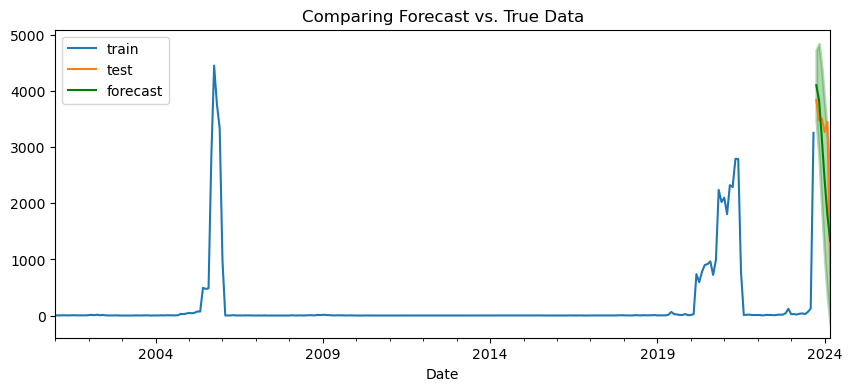

In [103]:
# Obtain summary of forecast as dataframe
forecast_df = arima_model.get_forecast(len(test)).summary_frame()

# Plot the forecast with true values
plot_forecast(train, test, forecast_df)

# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [104]:
# Obtain summary of model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                BATTERY   No. Observations:                  273
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1955.406
Date:                Mon, 25 Mar 2024   AIC                           3918.811
Time:                        16:58:03   BIC                           3933.234
Sample:                    01-31-2001   HQIC                          3924.602
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2363      0.039     31.926      0.000       1.160       1.312
ar.L2         -0.4206      0.037    -11.291      0.000      -0.494      -0.348
ma.L1         -0.9757      0.025    -38.812      0.000      -1.025      -0.926
sigma2      1.022e+05   1899.539     53.792      0.000    9.85e+04    1.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             25944.12
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             4.29
Prob(H) (two-sided):                  0.03   Kurtosis:                        50.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Auto Arima

In [105]:
auto_model = pm.auto_arima(train, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3936.553, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4311.795, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3964.503, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4079.351, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3935.641, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4005.329, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3934.325, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3934.618, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3933.244, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3934.588, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3934.351, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3931.405, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3964.348, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3933.025, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept

In [107]:
# Auto arima
auto_arima = tsa.ARIMA(train, order = auto_model.order).fit()

# Obtain summary
auto_arima.summary()

C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                BATTERY   No. Observations:                  273
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1961.813
Date:                Mon, 25 Mar 2024   AIC                           3931.626
Time:                        17:00:55   BIC                           3946.064
Sample:                    01-31-2001   HQIC                          3937.422
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.6928    444.412      0.391      0.696    -697.338    1044.724
ar.L1          1.2418      0.038     32.736      0.000       1.167       1.316
ar.L2         -0.4148      0.040    -10.305      0.000      -0.494      -0.336
sigma2      1.022e+05   5671.602     18.019      0.000    9.11e+04    1.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             27188.86
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             4.55
Prob(H) (two-sided):                  0.03   Kurtosis:                        51.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Final Model: (2,1,1)
- Had the lowest AIC and BIC scores

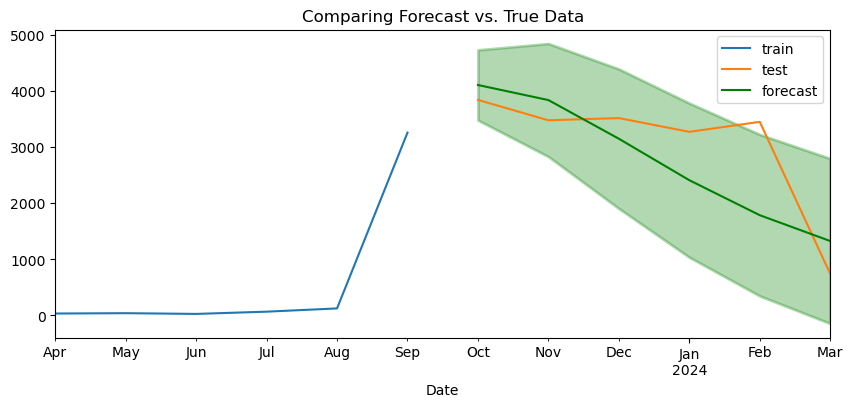

In [124]:
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 6);

### Summarizing the Forecast

In [117]:
# First value
starting_value = forecast_df['mean'].iloc[0]
starting_value

4105.883435065775

In [119]:
# Last value
final_value = forecast_df['mean'].iloc[-1]
final_value

1324.4466394860513

In [120]:
# Delta
change = final_value - starting_value
change

-2781.4367955797243

In [122]:
# Percentage change
perc_change = (change / starting_value) * 100
perc_change

-67.74271212439245

---

## Time Series: Theft

In [125]:
# Select crime for time series modeling
ts_theft = unstacked['THEFT']
ts_theft

Date
2001-01-31      15.0
2001-02-28       3.0
2001-03-31       3.0
2001-04-30       2.0
2001-05-31       3.0
               ...  
2023-11-30    4769.0
2023-12-31    5015.0
2024-01-31    4315.0
2024-02-29    4167.0
2024-03-31     787.0
Name: THEFT, Length: 279, dtype: float64

In [126]:
# Check nulls 
ts_theft.isna().sum()

0

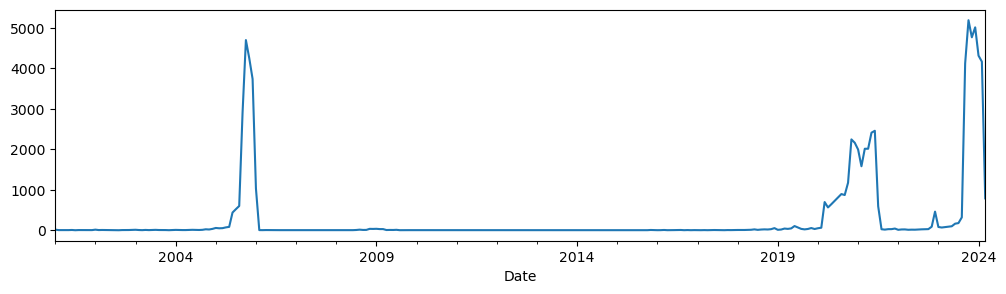

In [128]:
# plot
ts_theft.plot();

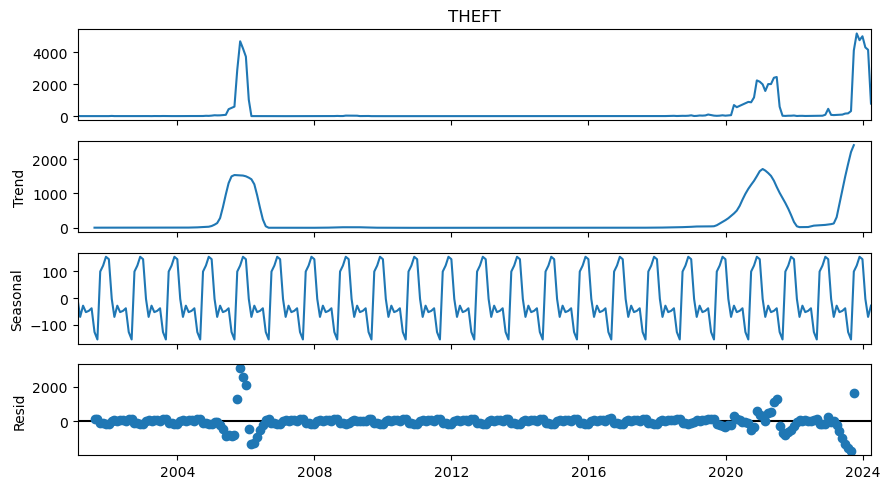

In [129]:
## Use Seasonal Decompose to check for seasonality
decomp = tsa.seasonal_decompose(ts_theft)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [130]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts_theft.max()-ts_theft.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 310.18091238471675 which is ~5.98% of the variation in time series.


In [131]:
# Check for stationarity
get_adfuller_results(ts_theft)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.991868,9,269,0.001454,0.05,True


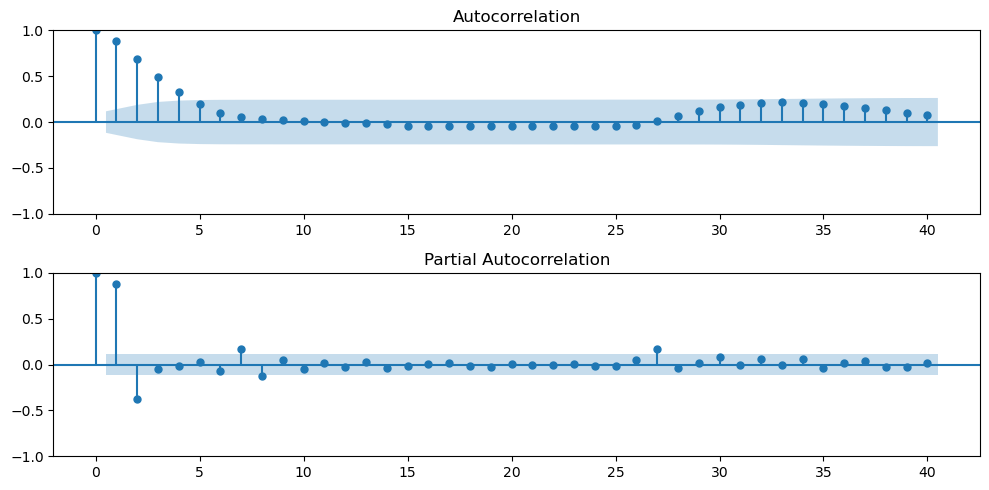

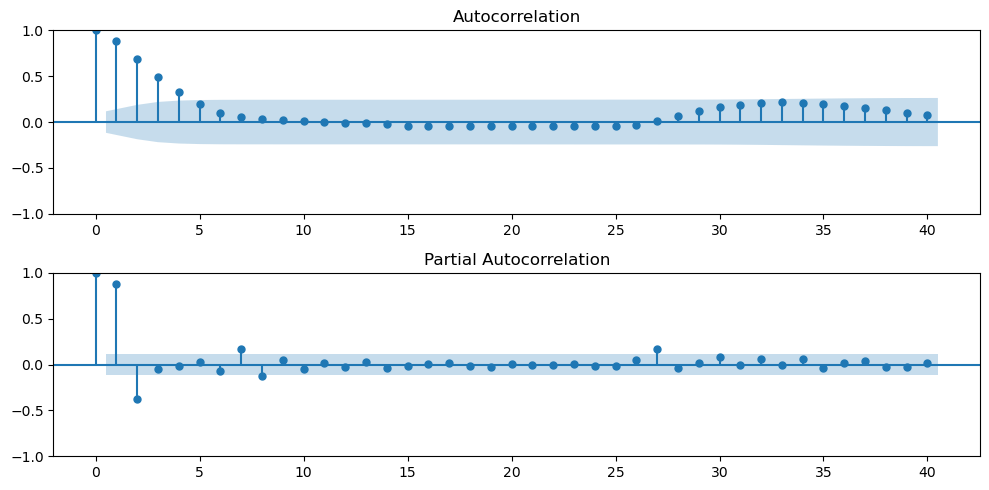

In [132]:
# Plot acf and pacf
plot_acf_pacf(ts_theft)

In [133]:
d = ndiffs(ts_theft)
print(f'd is {d}')

d is 1


### Train Test Split

In [135]:
# # Train test split
train, test = train_test_split(ts_theft, test_size = 6)

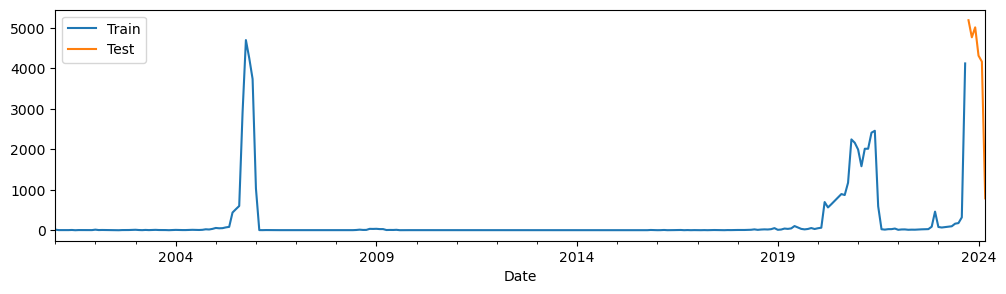

In [136]:
# # Visualize train-test-split
ax = train.plot(label = 'Train')
test.plot(ax = ax, label = 'Test')
ax.legend();

### Model and Evaluation

In [138]:
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0 # nonseasonal MA

# Define and fit the model
arima_model = tsa.ARIMA(train, order=(p,d,q)).fit()

C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,599.846
- MSE = 4,536,036.671
- RMSE = 2,129.797
- R^2 = -1.019
- MAPE = 117.29%


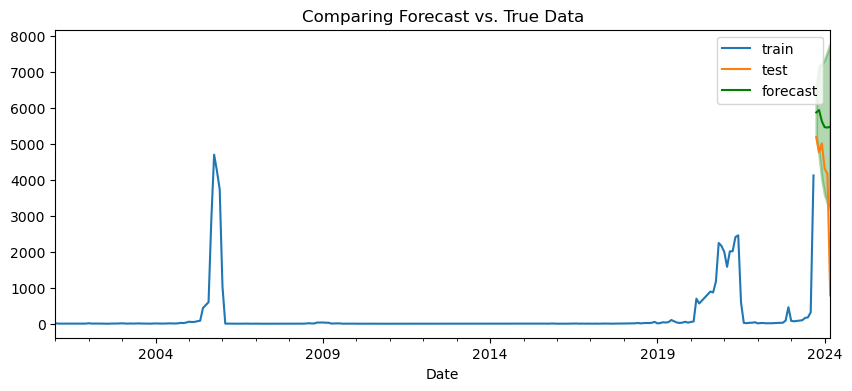

In [139]:
# Obtain summary of forecast as dataframe
forecast_df = arima_model.get_forecast(len(test)).summary_frame()

# Plot the forecast with true values
plot_forecast(train, test, forecast_df)

# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [140]:
# Obtain summary of model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  THEFT   No. Observations:                  273
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1981.414
Date:                Mon, 25 Mar 2024   AIC                           3968.827
Time:                        19:10:26   BIC                           3979.644
Sample:                    01-31-2001   HQIC                          3973.170
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4678      0.064      7.339      0.000       0.343       0.593
ar.L2         -0.1978      0.072     -2.753      0.006      -0.339      -0.057
sigma2      1.252e+05   2037.708     61.454      0.000    1.21e+05    1.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             45439.09
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             3.46
Prob(H) (two-sided):                  0.03   Kurtosis:                        65.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Auto Arima

In [142]:
auto_model = pm.auto_arima(train, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3974.508, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4332.518, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4008.663, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4104.918, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3974.289, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4037.421, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3973.727, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3972.568, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3971.541, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3972.358, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3970.604, Time=0.15 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3972.583, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3972.594, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3973.631, Time=0.06 sec
 ARIMA(4,0,2)(0,0,0)[0]          

In [143]:
# Auto arima
auto_arima = tsa.ARIMA(train, order = auto_model.order).fit()

# Obtain summary
auto_arima.summary()

C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\JOSH\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  THEFT   No. Observations:                  273
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1978.513
Date:                Mon, 25 Mar 2024   AIC                           3969.027
Time:                        19:12:21   BIC                           3990.683
Sample:                    01-31-2001   HQIC                          3977.720
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.6764    468.961      0.392      0.695    -735.471    1102.824
ar.L1          0.4465      0.185      2.416      0.016       0.084       0.809
ar.L2          0.5827      0.301      1.937      0.053      -0.007       1.172
ar.L3         -0.3483      0.151     -2.312      0.021      -0.644      -0.053
ma.L1          0.9070      0.170      5.332      0.000       0.574       1.240
sigma2      1.144e+05   5817.931     19.667      0.000    1.03e+05    1.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             45944.15
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             5.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        65.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 931.397
- MSE = 1,562,002.064
- RMSE = 1,249.801
- R^2 = 0.305
- MAPE = 26.67%


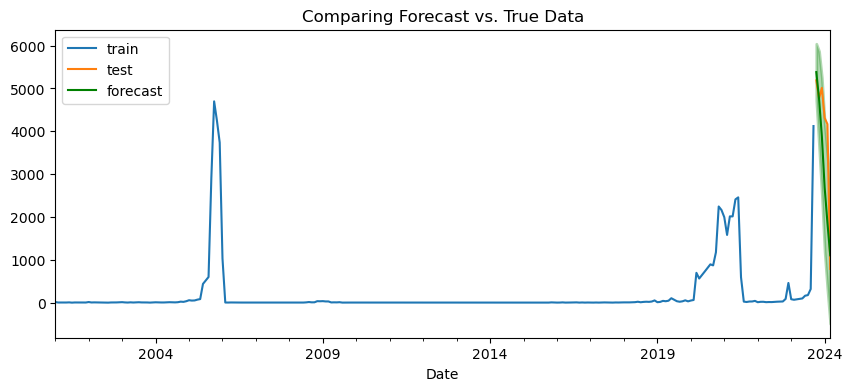

In [144]:
# Obtain summary of forecast as dataframe
forecast_df = auto_arima.get_forecast(len(test)).summary_frame()

# Plot the forecast with true values
plot_forecast(train, test, forecast_df)

# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

## Final Model (3,0,1)
- While manual arima and auto arima models hade similar AIC and BIC values, the MAPE of the auto arima had a lower percentage compared to the manual arima model

### Summarizing the Forecast

In [145]:
# First value
starting_value = forecast_df['mean'].iloc[0]
starting_value

5382.555827166684

In [146]:
# Last value
final_value = forecast_df['mean'].iloc[-1]
final_value

1105.3091501059794

In [147]:
# Delta
change = final_value - starting_value
change

-4277.246677060704

In [148]:
# Percentage change
perc_change = (change / starting_value) * 100
perc_change

-79.4649756435912

## Final Evaluation 

Of the two crimes, which is forecasted to have the highest montly count of crimes at the end of the forecast? 
- While both of the forecast predicts crime on battery and theft to decrease in the following months, the crime on battery has a higher count at the end of the forecast period compared to the later. 

Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?
- Crime on theft is forecasted to have a higher net change of 4277, comapred to crime on battery's 2781 net change by the end of the forecast. 

Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast? 
- While both of the forecast predicts crime on battery and theft to decrease in the following months, the crime on theft has a higher percentage change compared to the former.
- Crime on theft is expected to decrease by 79% in a span of six months, compared to crimes on battery with a percentage drop of only 67%

## Final Recommendations

What recommendation would you make to the stakeholders:
- Focus on crimes with high counts, which was mentioned in the first part of the analysis
- While both crimes on battery and theft is forecasted to drastically decrease over the forecasted period (6 months), the Chicago law enforcers should dig deeper into these crimes
  - Check shorter time frames (Weekly, daily, hourly)
  - Check location of crimes and try to draw inferences for future analysis

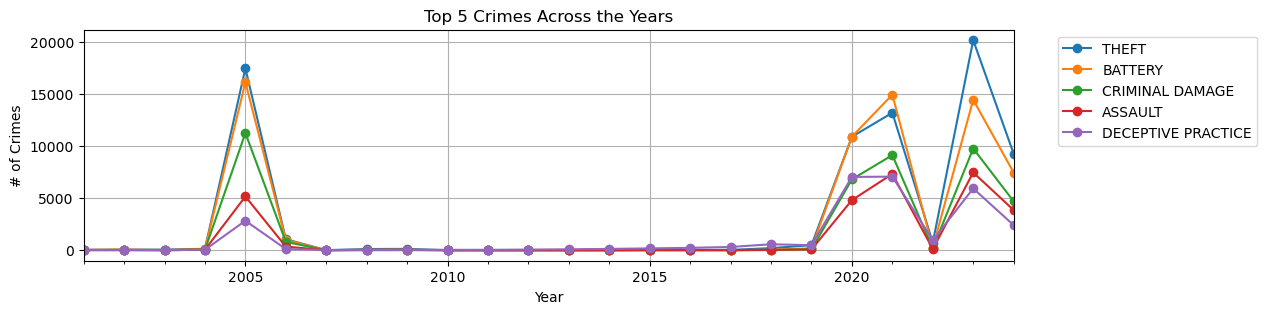

In [149]:
# Recap of the highest crime counts across the years
fig, ax = plt.subplots()
crime_df_Y.plot(figsize = (12,3), grid = True, style = 'o-', ax = ax)
ax.set(title = 'Top 5 Crimes Across the Years', ylabel = '# of Crimes', xlabel = 'Year')
ax.legend(loc='best', bbox_to_anchor=(1.04, 1));